In [ ]:
# Initialize Otter
import otter
grader = otter.Notebook("quiz07.ipynb")

# Quiz 7: Testing Hypotheses

**Reading**: 
* [Testing Hypotheses](https://www.inferentialthinking.com/chapters/11/testing-hypotheses.html)

Please complete this notebook by filling in the cells provided.

Directly sharing answers is not okay, but discussing problems with the course staff or with other students is encouraged. Refer to the policies page to learn more about how to learn cooperatively.

For all problems that you must write our explanations and sentences for, you **must** provide your answer in the designated space. Moreover, throughout this quiz and all future ones, please be sure to not re-assign variables throughout the notebook! For example, if you use `max_temperature` in your answer to one question, do not reassign it later on.

In [1]:
# Don't change this cell; just run it. 

import numpy as np
from datascience import *

# These lines do some fancy plotting magic.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)



## 1. Spam Calls


## Part 1: 781 Fun

Yanay gets a lot of spam calls. An area code is defined to be a three digit number from 200-999 inclusive. In reality, many of these area codes are not in use, but for this question we'll simplify things and assume they all are. **Throughout these questions, you should assume that Yanay's area code is 781.**

**Question 1.** Assuming each area code is just as likely as any other, what's the probability that the area code of two back to back spam calls are 781?


<!--
BEGIN QUESTION
name: q1_1
manual: false
-->

In [2]:
prob_781 = (1/800)**2 # SOLUTION
prob_781

1.5625e-06

In [ ]:
grader.check("q1_1")

**Question 2.** Rohan already knows that Yanay's area code is 781. Rohan randomly guesses the last 7 digits (0-9 inclusive) of his phone number. What's the probability that Rohan correctly guesses Yanay's number, assuming he’s equally likely to choose any digit?

*Note: A phone number contains an area code and 7 additional digits, i.e. xxx-xxx-xxxx*

<!--
BEGIN QUESTION
name: q1_2
manual: false
-->

In [5]:
prob_yanay_num = 1/(10**7) # SOLUTION
prob_yanay_num

1e-07

In [ ]:
grader.check("q1_2")

Yanay suspects that there's a higher chance that the spammers are using his area code (781) to trick him into thinking it's someone from his area calling him. Ashley thinks that this is not the case, and that spammers are just choosing area codes of the spam calls at random from all possible area codes (*Remember, for this question we’re assuming the possible area codes are 200-999, inclusive*). Yanay wants to test his claim using the 50 spam calls he received in the past month.

Here's a dataset of the area codes of the 50 spam calls he received in the past month.

In [8]:
# Just run this cell
spam = Table().read_table('spam.csv')
spam

Area Code
891
924
516
512
328
613
214
781
591
950


<!-- BEGIN QUESTION -->

**Question 3.** Define the null hypothesis and alternative hypothesis for this investigation. 

*Hint: Don’t forget that your null hypothesis should fully describe a probability model that we can use for simulation later.*


<!--
BEGIN QUESTION
name: q1_3
manual: true
-->

_Type your answer here, replacing this text._

**SOLUTION:** **Null hypothesis:** Area codes for Yanay's spam calls are chosen at random, and each area code (200-999) is equally likely to be chosen. **Alternative hypothesis:** There's a higher chance of getting a spam call with an area code of 781.

<!-- END QUESTION -->

**Question 4.** Which of the following test statistics would be a reasonable choice to help differentiate between the two hypotheses?

*Hint*: For a refresher on choosing test statistics, check out the textbook section on [Test Statistics](https://www.inferentialthinking.com/chapters/11/3/decisions-and-uncertainty.html#Step-2:-The-Test-Statistic).

1. The proportion of area codes that are 781 in 50 random spam calls
2. The total variation distance (TVD) between probability distribution of randomly chosen area codes, and the observed distribution of area codes. (*Remember the possible area codes are 200-999 inclusive*)
3. The probability of getting an area code of 781 out of all the possible area codes.
4. The proportion of area codes that are 781 in 50 random spam calls divided by 2
5. The number of times you see the area code 781 in 50 random spam calls

Assign `reasonable_test_statistics` to an array of numbers corresponding to these test statistics.

<!--
BEGIN QUESTION
name: q1_4
manual: false
-->

In [9]:
reasonable_test_statistics = make_array(1, 4 ,5) # SOLUTION

In [ ]:
grader.check("q1_4")

<div class="hide">\pagebreak</div>

**For the rest of this question, suppose you decide to use the number of times you see the area code 781 in 50 spam calls as your test statistic.**

**Question 5.** 
Write a function called `simulate` that generates exactly one simulated value of your test statistic under the null hypothesis.  It should take no arguments and simulate 50 area codes under the assumption that the result of each area is sampled from the range 200-999 inclusive with equal probability. Your function should return the number of times you saw the 781 area code in those 50 random spam calls.


<!--
BEGIN QUESTION
name: q1_5
manual: false
-->

In [15]:
possible_area_codes = np.arange(200, 1000) # SOLUTION
def simulate():
    # BEGIN SOLUTION
    random_area_codes = np.random.choice(possible_area_codes, 50)
    return np.count_nonzero(random_area_codes == 781)
    # END SOLUTION
    
# Call your function to make sure it works
simulate()

0

In [ ]:
grader.check("q1_5")

**Question 6.** Generate 20,000 simulated values of the number of times you see the area code 781 in 50 random spam calls. Assign `test_statistics_under_null` to an array that stores the result of each of these trials. 

*Hint*: Use the function you defined in Question 5.

<!--
BEGIN QUESTION
name: q1_6
manual: false
-->

In [19]:
test_statistics_under_null = make_array() # SOLUTION
repetitions = 20000 # SOLUTION

# BEGIN SOLUTION
for i in np.arange(repetitions):
    one_statistic = simulate()
    test_statistics_under_null = np.append(test_statistics_under_null, one_statistic)
# END SOLUTION
    
test_statistics_under_null

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
grader.check("q1_6")

<!-- BEGIN QUESTION -->

**Question 7.** Using the results from Question 6, generate a histogram of the empirical distribution of the number of times you saw the area code 781 in your simulation. **NOTE: Use the provided bins when making the histogram**

<!--
BEGIN QUESTION
name: q1_7
manual: true
-->

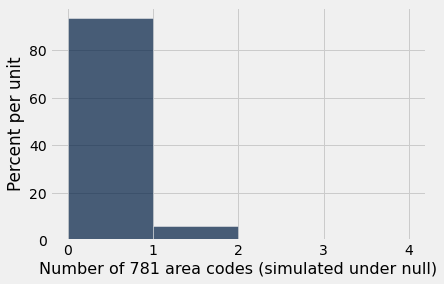

In [25]:
bins = np.arange(0,5,1) # Use these provided bins
# BEGIN SOLUTION
Table().with_column("Number of 781 area codes (simulated under null)", test_statistics_under_null).hist(bins = bins)
# END SOLUTION

<!-- END QUESTION -->

<div class="hide">\pagebreak</div>

**Question 8.** Compute an empirical P-value for this test.


<!--
BEGIN QUESTION
name: q1_8
manual: false
-->

In [26]:
# First calculate the observed value of the test statistic from the `spam` table.
observed_val = spam.where("Area Code", 781).num_rows # SOLUTION
p_value = np.count_nonzero(test_statistics_under_null >= observed_val) / 20000 # SOLUTION
p_value

0.0016

In [ ]:
grader.check("q1_8")

<!-- BEGIN QUESTION -->

**Question 9.** Suppose you use a P-value cutoff of 1%. What do you conclude from the hypothesis test? Why?

<!--
BEGIN QUESTION
name: q1_9
manual: true
-->

_Type your answer here, replacing this text._

**SOLUTION:** The p-value we observed is below the 1% cutoff, so we conclude that the data support the alternative hypothesis.

<!-- END QUESTION -->



## Part 2: Multiple Spammers

Instead of checking if the area code is equal to his own, Yanay decides to check if the area code matches the area code of one of the 8 places he's been to recently, and wants to test if it's more likely to receive a spam call with an area code from any of those 8 places. These are the area codes of the places he's been to recently: 781, 617, 509, 510, 212, 858, 339, 626.

<!-- BEGIN QUESTION -->

**Question 10.** Define the null hypothesis and alternative hypothesis for this investigation.

*Reminder: Don’t forget that your null hypothesis should fully describe a probability model that we can use for simulation later.*


<!--
BEGIN QUESTION
name: q1_10
manual: true
-->

_Type your answer here, replacing this text._

**SOLUTION:** **Null hypothesis:** Area codes for Yanay's spam calls are chosen at random, and each area code (200-999) is equally likely to be chosen. **Alternative Hypothesis:** There's a higher chance of getting a spam call with an area code of one of the 8 palces he's been to recently (781, 617, 509, 510, 212, 858, 339, 626).

<!-- END QUESTION -->

<div class="hide">\pagebreak</div>

**Suppose you decide to use the number of times you see any of the area codes of the places Yanay has been to in 50 spam calls as your test statistic.**

**Question 11.** 
Write a function called `simulate_visited_area_codes` that generates exactly one simulated value of your test statistic under the null hypothesis.  It should take no arguments and simulate 50 area codes under the assumption that the result of each area is sampled from the range 200-999 inclusive with equal probability. Your function should return the number of times you saw any of the area codes of the places Yanay has been to in those 50 spam calls.

*Hint*: You may find the textbook [section](https://www.inferentialthinking.com/chapters/11/1/Assessing_Models#Predicting-the-Statistic-Under-the-Model) on the `sample_proportions` function to be useful.

<!--
BEGIN QUESTION
name: q1_11
manual: false
-->

In [34]:
model_proportions = make_array(8/800, 792/800)
def simulate_visited_area_codes():
    # BEGIN SOLUTION
    sampled_props = sample_proportions(50, model_proportions)
    prop_visited = sampled_props.item(0)
    return prop_visited * 50
    # END SOLUTION
    
# Call your function to make sure it works
simulate_visited_area_codes()

1.0

In [ ]:
grader.check("q1_11")

**Question 12.** Generate 20,000 simulated values of the number of times you see any of the area codes of the places Yanay has been to in 50 random spam calls. Assign `test_statistics_under_null` to an array that stores the result of each of these trials. 

*Hint*: Use the function you defined in Question 11.

<!--
BEGIN QUESTION
name: q1_12
manual: false
-->

In [52]:
visited_test_statistics_under_null = make_array() # SOLUTION

repetitions = 20000 # SOLUTION
# BEGIN SOLUTION
for i in np.arange(repetitions):
    visited_statistic = simulate_visited_area_codes()
    visited_test_statistics_under_null = np.append(visited_test_statistics_under_null, visited_statistic)
# END SOLUTION
visited_test_statistics_under_null

array([2., 0., 1., ..., 0., 1., 0.])

In [ ]:
grader.check("q1_12")

<!-- BEGIN QUESTION -->

**Question 13.** Using the results from Question 12, generate a histogram of the empirical distribution of the number of times you saw any of the area codes of the places Yanay has been to in your simulation. **NOTE: Use the provided bins when making the histogram**

<!--
BEGIN QUESTION
name: q1_13
manual: true
-->

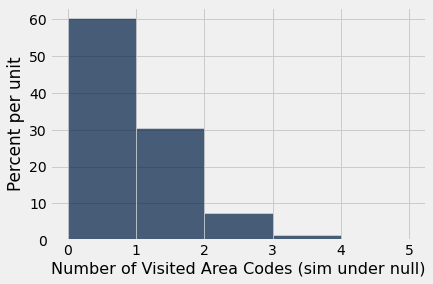

In [45]:
bins_visited = np.arange(0,6,1) # Use these provided bins
# BEGIN SOLUTION
Table().with_column("Number of Visited Area Codes (sim under null)", visited_test_statistics_under_null).hist(bins = bins_visited)
# END SOLUTION

<!-- END QUESTION -->

<div class="hide">\pagebreak</div>

**Question 14.** Compute an empirical P-value for this test.


<!--
BEGIN QUESTION
name: q1_14
manual: false
-->

In [53]:
visited_area_codes = make_array(781, 617, 509, 510, 212, 858, 339, 626)
# First calculate the observed value of the test statistic from the `spam` table.
visited_observed_value = spam.where("Area Code", are.contained_in(visited_area_codes)).num_rows # SOLUTION
p_value = np.count_nonzero(visited_test_statistics_under_null >= visited_observed_value) / 20000 # SOLUTION
p_value

0.0009

In [ ]:
grader.check("q1_14")

<!-- BEGIN QUESTION -->

**Question 15.** Suppose you use a P-value cutoff of 0.05% (**Note: that’s 0.05%, not our usual cutoff of 5%**). What do you conclude from the hypothesis test? Why?

<!--
BEGIN QUESTION
name: q1_15
manual: true
-->

_Type your answer here, replacing this text._

**SOLUTION:** The p-value we observed is above the 0.05% cutoff, so we conclude that the data supports the null hypothesis.

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Question 16.** Is `p_value`:

* (a) the probability that the spam calls favored the visited area codes,
* (b) the probability that they didn't favor, or
* (c) neither

If you chose (c), explain what it is instead.


<!--
BEGIN QUESTION
name: q1_16
manual: true
-->

_Type your answer here, replacing this text._

**SOLUTION:** (c) Neither. The p-value is just the probability that the test statistic (the number of spam calls Yanay got from the eight area codes he's visited) is equal to the value that was observed in the data or is even fruther in the direction of the alternative if the null hypotehsis were true.

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Question 17.** Is 0.05% (the P-value cutoff):

* (a) the probability that the spam calls favored the visited area codes,
* (b) the probability that they didn't favor, or
* (c) neither

If you chose (c), explain what it is instead.

<!--
BEGIN QUESTION
name: q1_17
manual: true
-->

_Type your answer here, replacing this text._

**SOLUTION:** (c) Neither. It's just the cutoff we used to decide whether to reject the null hypothesis. It can be interpreted as the probability of the test rejecting the null hypothesis if the null hypotehsis were true.

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Question 18.** Suppose you run this test for 4000 different people after observing each person's last 50 spam calls. When you reject the null hypothesis for a person, you accuse the spam callers of favoring the area codes that person has visited. If the spam callers were not actually favoring area codes that people have visited, can we compute how many times we will incorrectly accuse the spam callers of favoring area codes that people have visited? If so, what is the number? Explain your answer. Assume a 0.05% P-value cutoff.

<!--
BEGIN QUESTION
name: q1_18
manual: true
-->

_Type your answer here, replacing this text._

**SOLUTION:** We will incorrectly accuse the spam callers 2 times, or 0.05% of 4000. Since we're using 0.05% as our P-value cutoff, we have a 0.05% chance of rejecting the null hypothesis when it's actually true. We're running 4000 separate tests, and 0.05% of 4000 is 2.

<!-- END QUESTION -->



## Part 3: Practice with A/B Tests

Yanay collects information about this month's spam calls. The table `with_labels` is a sampled table, where the `Area Code Visited` column contains either `"Yes"` or `"No"` which represents whether or not Yanay has visited the location of the area code. The `Picked Up` column is `1` if Yanay picked up and `0` if he did not pick up.

In [56]:
# Just run this cell
with_labels = Table().read_table("spam_picked_up.csv")
with_labels

Area Code Visited,Picked Up
No,0
No,1
No,1
Yes,0
No,0
No,0
Yes,0
No,1
No,1
No,1


Yanay is going to perform an A/B Test to see whether or not he is more likely to pick up a call from an area code he has visited. Specifically, his null hypothesis is that there is no difference in the distribution of calls he picked up between visited and not visited area codes, with any difference due to chance. His alternative hypothesis is that there is a difference between the two categories, specifically that he thinks that he is more likely to pick up if he has visited the area code. We are going to perform a [permutation test](https://www.inferentialthinking.com/chapters/12/1/AB_Testing.html#Permutation-Test) to test this. Our test statistic will be the difference in proportion of calls picked up between the area codes Yanay visited and the area codes he did not visit.

**Question 19.** Complete the `difference_in_proportion` function to have it calculate this test statistic, and use it to find the observed value. The function takes in a sampled table which can be any table that has the same columns as `with_labels`. We'll call `difference_in_proportion` with the sampled table `with_labels` in order to find the observed difference in proportion.

<!--
BEGIN QUESTION
name: q1_19
manual: false
-->

In [62]:
def difference_in_proportion(sample):
    # Take a look at the code for `proportion_visited` and use that as a 
    # hint of what `proportions` should be assigned to
    proportions = sample.group("Area Code Visited", np.mean) # SOLUTION
    proportion_visited = proportions.where("Area Code Visited", "Yes").column("Picked Up mean").item(0)
    proportion_not_visited = proportions.where("Area Code Visited", "No").column("Picked Up mean").item(0)
    return proportion_visited - proportion_not_visited # SOLUTION

observed_diff_proportion = difference_in_proportion(with_labels)
observed_diff_proportion

0.21904761904761905

In [ ]:
grader.check("q1_19")

**Question 20.** To perform a permutation test we shuffle the labels, because our null hypothesis is that the labels don't matter because the distribution of calls he picked up between visited and not visited area codes come from same underlying distribution. The labels in this case is the `"Area Code Visited"` column containing `"Yes"` and `"No"`.

Write a function to shuffle the table and return a test statistic using the function you defined in question 19.

*Hint: To shuffle labels, we sample without replacement and then replace the appropriate column with the new shuffled column.*

<!--
BEGIN QUESTION
name: q1_20
manual: false
-->

In [69]:
def simulate_one_stat():
    shuffled = with_labels.sample(with_replacement = False) # SOLUTION
    original_with_shuffled_labels = with_labels.with_column("Area Code Visited", shuffled.column("Area Code Visited")) # SOLUTION
    return difference_in_proportion(original_with_shuffled_labels)

one_simulated_test_stat = simulate_one_stat() 
one_simulated_test_stat

0.21904761904761905

In [ ]:
grader.check("q1_20")

<!-- BEGIN QUESTION -->

**Question 21.** Generate 1,000 simulated test statistic values. Assign `test_stats` to an array that stores the result of each of these trials. 

*Hint*: Use the function you defined in Question 20.

We also provided code that'll generate a histogram for you after generating a 1000 simulated test statistic values.

<!--
BEGIN QUESTION
name: q1_21
manual: true
-->

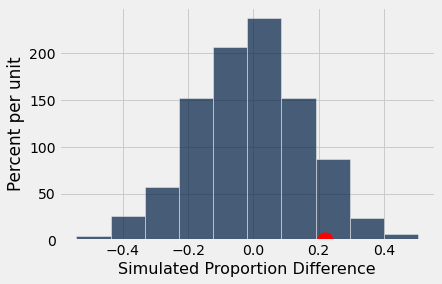

In [73]:
trials = 1000 # SOLUTION
test_stats = make_array() # SOLUTION

# BEGIN SOLUTION
for i in np.arange(trials):
    one_stat = simulate_one_stat()
    test_stats = np.append(test_stats, one_stat)
# END SOLUTION

# here's code to generate a histogram of values and the red dot is the observed value
Table().with_column("Simulated Proportion Difference", test_stats).hist("Simulated Proportion Difference");
plt.plot(observed_diff_proportion, 0, 'ro', markersize=15);

<!-- END QUESTION -->

**Question 22.** Compute the empirical p-value for this test, and assign it to `p_value_ab`.

<!--
BEGIN QUESTION
name: q1_22
manual: false
-->

In [75]:
p_value_ab = np.count_nonzero(test_stats >= observed_diff_proportion) / len(test_stats) # SOLUTION
p_value_ab

0.123

In [ ]:
grader.check("q1_22")

For `p_value_ab`, you should be getting a value around 10-15%. If our p-value cutoff is 5%, the data is more consistent with the null hypothesis - that there is no difference in the distribution of calls Yanay picked up between visited and not visited area codes.

## Submission
Once you're finished, select "Save and Checkpoint" in the File menu.      Your name and course section number should be in the first and last cell of the assignment.          Be sure you have run all cells with code and that the output from that is showing. 

#### Double check that you have completed all of the free response questions as the      autograder does NOT check that and YOU are responsible for knowing those questions are there          and completing them as part of the grade for this lab.

When ready, click "Print              Preview" in the File menu. Print a copy from there in pdf format. (This means you right                  click and choose print and choose "save as pdf" from your printer options.) You will                     need to submit the pdf in Canvas by the deadline.

The grader output                         and/or output from your coding are essential to helping your instructor                             grade your work correctly and in a timely manner.

Files                                 submitted that are missing the required output will lose some                                     to all points so double check your pdf before submitting.
To double-check your work, the cell below will rerun all of the autograder tests.

---

To double-check your work, the cell below will rerun all of the autograder tests.

In [ ]:
grader.check_all()